<a href="https://colab.research.google.com/github/Jenn-mawia/Regression-Mini-projects/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**
> Build a multivariate model that predicts the quality of wine. 

# **Importing libraries**

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression


# **Reading the data**

In [2]:
# read the data
wine = pd.read_csv("winequality-red.csv")

# check number of records in the dataset
print(wine.shape)
# check top of the dataset
wine.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data is made of 1599 entries with 12 columns. The data is also numerical in nature. 

# **Quick data cleaning**

In [3]:
# check data types
print(wine.dtypes)

# check missing values
print(wine.isnull().sum()) #there are no missing values in the data

# check for any duplicate entried
print(f"Duplicated entries: {wine.duplicated().sum()}") #there are 240 duplicated entries

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicated entries: 240


In [4]:
# drop duplicates while keeping the first entry
wine = wine.drop_duplicates(keep='first')
print(f"Duplicate entries: {wine.duplicated().sum()}")

Duplicate entries: 0


# **Exploratory Data Analysis**

## **Univariate Analysis**

In [5]:
# summary statistics
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

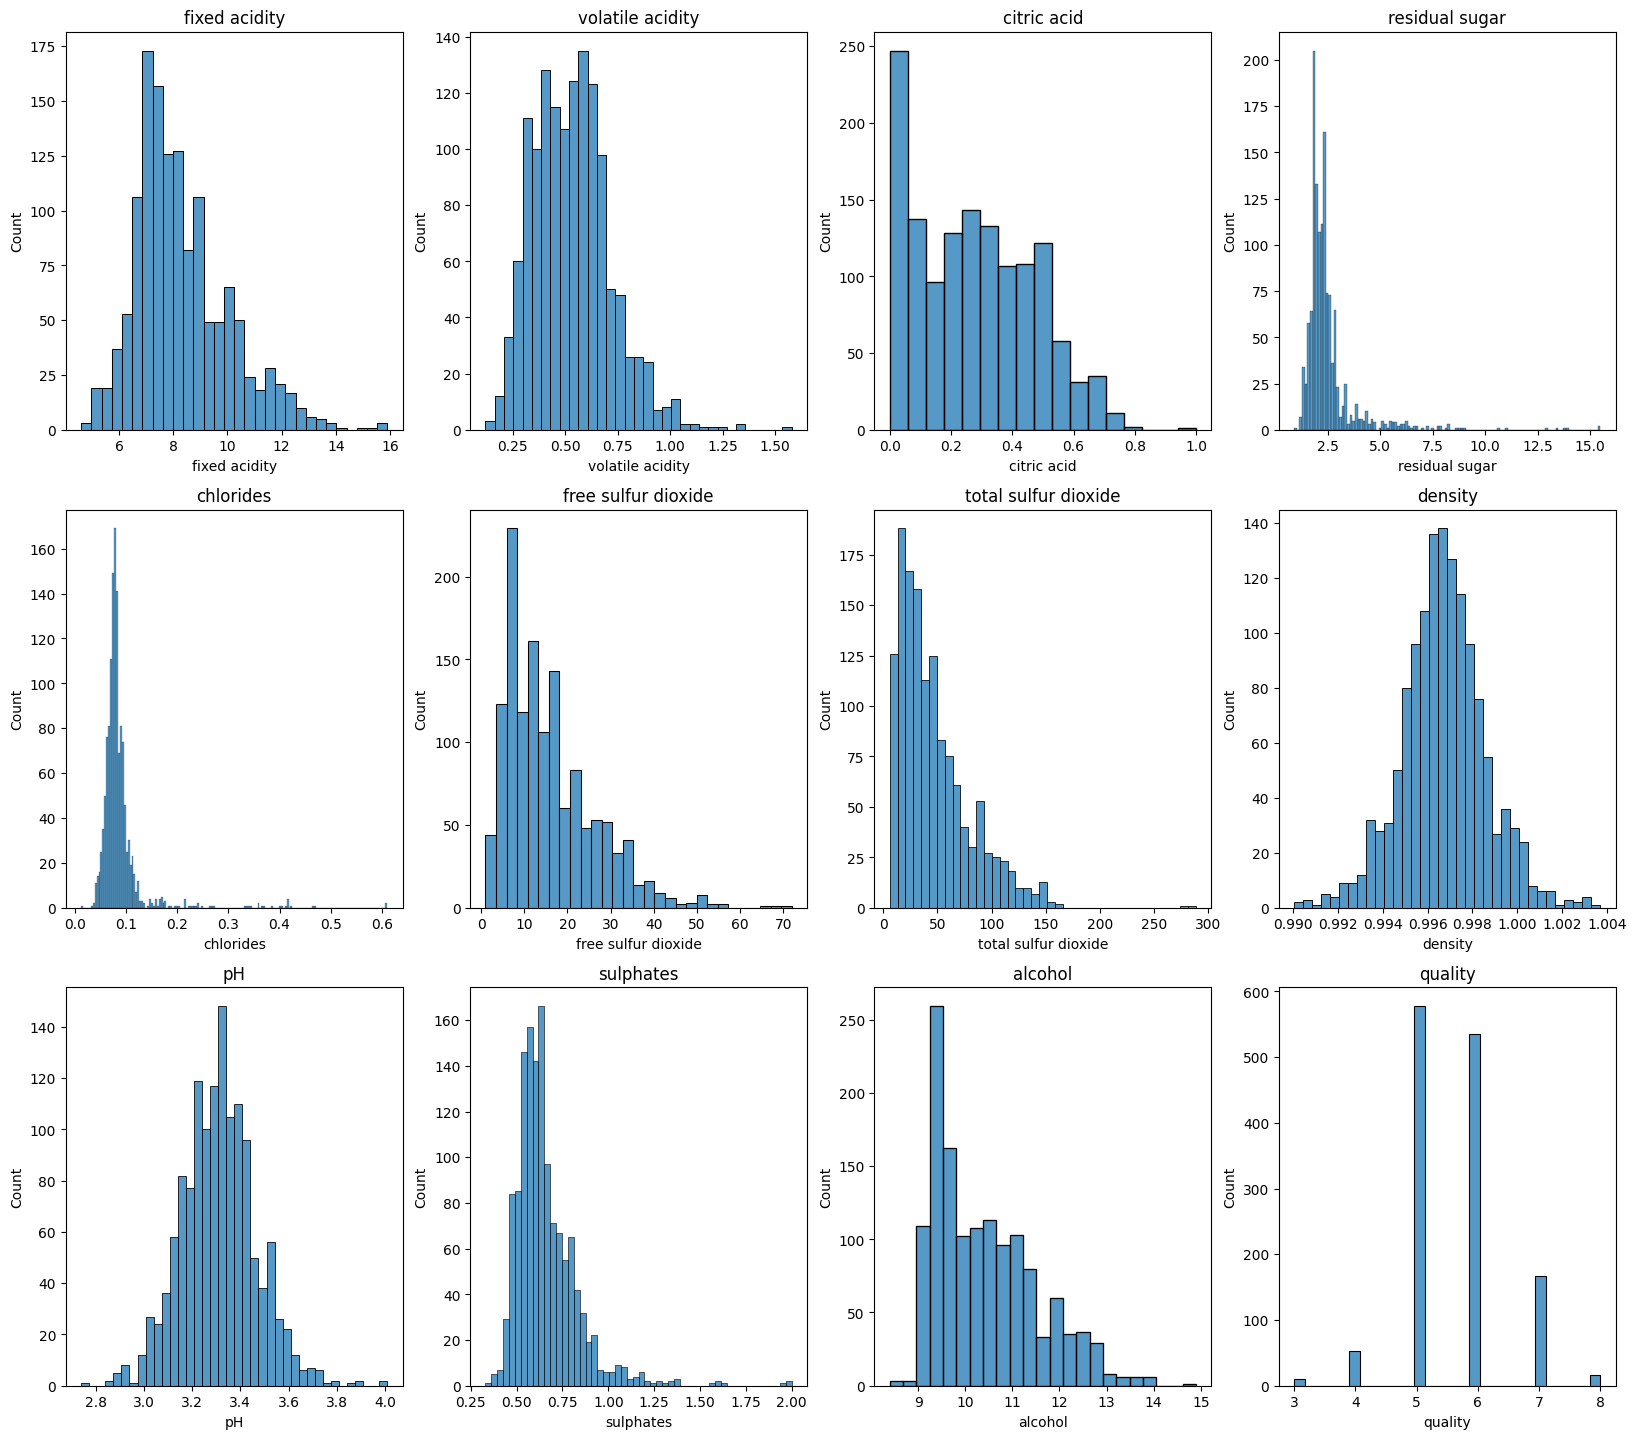

In [7]:
wine_dict = {'fixed acidity':1, 'volatile acidity':2, 'citric acid':3, 'residual sugar':4,'chlorides':5, 
             'free sulfur dioxide':6, 'total sulfur dioxide':7, 'density':8,'pH':9, 'sulphates':10, 
             'alcohol':11, 'quality':12}

# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in wine_dict.items():
  
  plt.subplot(5,4,i)
  sns.histplot(wine[variable])
  plt.title(variable)

plt.show()

Most of the variables appear to be skewed to the right. The target variable ("quality") is of the ordinal type. 

In [8]:
wine.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

If skewness is 0, the data are perfectly symmetrical.
As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

> Variables that are highly skewed here are: 
- residual sugar
- chlorides
- fress sulfur dioxide
- total sulfur dioxide
- sulphates

> Variables that show an almost symmetric/normal distribution are : density and pH as seen on the visuals. 

## **Bivariate analysis**

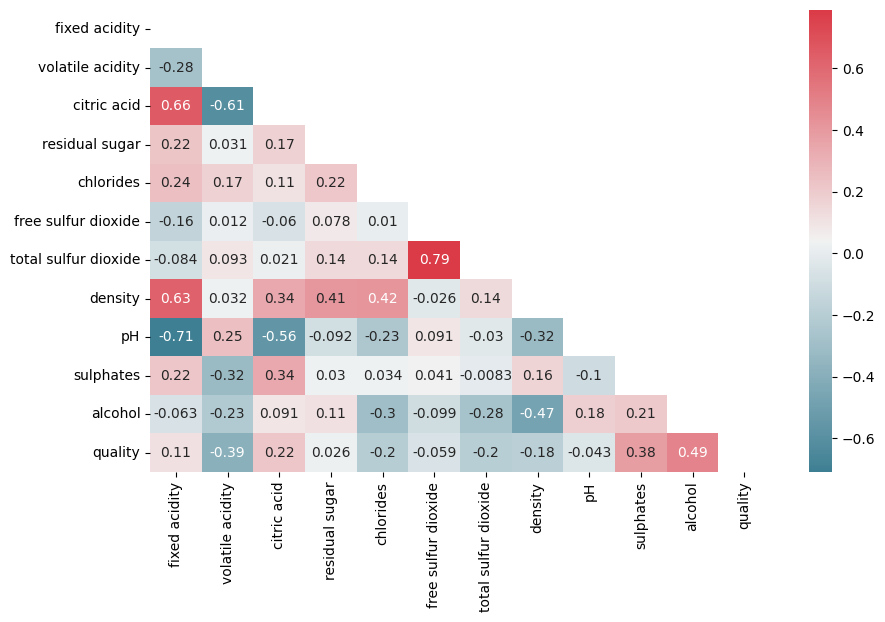

In [9]:
# correlation plot of the dataset
plt.figure(figsize=(10,6))

mask = np.triu(np.ones_like(wine.corr('spearman'), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(wine.corr('spearman'),mask=mask, cmap=cmap, annot=True)
plt.show()    

The variables that are highly correlated are:
- fixed acidity and density(0.63),
- fixed acidity and pH(0.71), 
- fixed acidity and citric acid(0.66),
- volatile acidity and citric acid(-0.61),
- citric acid and pH(-0.56),
- free sulfur dioxide and total sulfur dioxide(0.79), 
- alcohol and density(-0.47), 
- alcohol and quality(0.49) 


> This is a sign of multicolinearity which is not desirable for a linear regression problem. 

# **Modeling**

## **Baseline Model**

In [20]:
# selecting features and labels
X = wine.drop(['quality'], axis=1).values
y = wine['quality'].values


# scaling the features
X = StandardScaler().fit_transform(X) 

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = LinearRegression()
# fit training sets onto the model
model.fit(X_train, y_train)

# Make predictions on testing data
y_base_pred = model.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_base_pred})
print(predictions.describe())

# Evaluate model performance 
# check the model performance 
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_base_pred))
print('MSE_base:', metrics.mean_squared_error(y_test, y_base_pred))
print('RMSE_base:', np.sqrt(metrics.mean_squared_error(y_test, y_base_pred)))
print('R_squared_base:', metrics.r2_score(y_test, y_base_pred))

           Actual   Predicted
count  408.000000  408.000000
mean     5.639706    5.650197
std      0.835392    0.511217
min      3.000000    4.468509
25%      5.000000    5.254551
50%      6.000000    5.564415
75%      6.000000    6.015074
max      8.000000    7.789893
Mean Absolute Error : 0.5481520713460861
MSE_base: 0.5117257259811306
RMSE_base: 0.7153500723290176
R_squared_base: 0.2649398875652752


Checking the comparison dataframe of the actual and predicted values, the model is not badly off as the actual and predicted values are within the same range, except for the standard deviation and minimum values that are a little bit off. 

> The R^2 value is also very small --> an indication that the model does not quite make the right predictions. A good model has an R^2 score greater 0.5 or much closer to 1.

> The target variable(quality) ranges from 3 to 8 with an average of 5.62 and a standard deviation of 0.82. Hence this makes an RMSE of 0.71535 somewhat acceptable.

Does the model improve when multicolinearity present in the features is handled?

**Handling multicolinearity**

### **Compute VIF scores**

In the presence of multicollinearity, the solution of the regression model becomes unstable.

> Multicollinearity can assessed by computing a score called the **variance inflation factor(VIF)**, which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

The VIF of a predictor is a measure for how easily it is predicted from a linear regression using the other predictors.

>Remove the correlated features by computing there VIFs and removing the columns with the highest VIF scores

High VIF score exceeding 5 or 10 shows there is a high multicolinearity.

In [10]:
# remove the target variable
df = wine.drop("quality",1)


<ipython-input-10-5bc94c546849>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = wine.drop("quality",1)


In [11]:
# compute the VIF scores
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [12]:
# calling the function
calc_vif(df)

,variables,VIF
0,fixed acidity,75.023032
1,volatile acidity,16.460387
2,citric acid,9.188892
3,residual sugar,4.915733
4,chlorides,6.349793
5,free sulfur dioxide,6.432241
6,total sulfur dioxide,6.543918
7,density,1500.387873
8,pH,1095.732046
9,sulphates,21.946341


Remove all features with extremely high VIF scores (density, pH, fixed acidity, volatile acidity, sulphates and alcohol) and check if doing this has any effect on the other features. 

Obviously, this is not the best method to reduce multicolinearity because removing all these features leads to **information loss(Only left with 4 variables for modeling with)**. Most of the important features are lost in the process and this will definitely affect the accuracy and stability of the model. 

Features such as free sulfur dioxide and total sulfur dioxide that were seen to be highly correlated on the correlation plot are not captured in the VIF scores which is not a good sign.







In [13]:
df1 = df.drop(['fixed acidity','volatile acidity','density', 'pH', 'sulphates','alcohol'], 1) 

# compute VIF scores again
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

<ipython-input-13-9d8f27dd0790>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop(['fixed acidity','volatile acidity','density', 'pH', 'sulphates','alcohol'], 1)


In [14]:
# calling the function
calc_vif(df1)

,variables,VIF
0,citric acid,2.931650
1,residual sugar,3.801494
2,chlorides,3.372893
3,free sulfur dioxide,5.579587
4,total sulfur dioxide,5.475729


## **Linear regression after removing features with high VIF scores.**




In [16]:
# selecting features and labels
X = df1.values  #feature-set
y = wine['quality'].values #labels

# scaling the features
X = StandardScaler().fit_transform(X) # normalizing the features

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

linear = LinearRegression()
# fit training sets onto the model
linear.fit(X_train, y_train)

# predict using the test set
y_linear_predict = linear.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_predict})
print(predictions.describe())

# check the model performance 
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_linear_predict))
print('MSE_linear:', metrics.mean_squared_error(y_test, y_linear_predict))
print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

           Actual   Predicted
count  408.000000  408.000000
mean     5.639706    5.617193
std      0.835392    0.290967
min      3.000000    4.733372
25%      5.000000    5.461206
50%      6.000000    5.601656
75%      6.000000    5.838876
max      8.000000    6.379775
Mean Absolute Error : 0.6191325200713057
MSE_linear: 0.6078266782803269
RMSE_linear: 0.7796323994552349
R_squared: 0.12689723460563873


Checking the comparison dataframe of the actual and predicted values, the model is not badly off as the actual and predicted values are within the same range, except for the standard deviation, minimum and maximum values that are a little bit off. 

> The R^2 value is also very small --> an indication that the model does not quite make the right predictions. The R^2 is smaller than the baseline model. Obviously, this model does not perform well. 

> The target variable(quality) ranges from 3 to 8 with an average of 5.62 and a standard deviation of 0.82. Hence this makes an RMSE of 0.7796 somewhat acceptable. 

We however need to compare the performance of this model to other models in order to establish the best model. 

Does the model improve when different methods of handling multicolinearity are employed? 

### **Dropping the correlated features manually**

From the correlation plot above, we established features that were highly correlated: 

- fixed acidity and density(0.63),
- fixed acidity and pH(0.71),
- fixed acidity and citric acid(0.66),
- volatile acidity and citric acid(-0.61),
- citric acid and pH(-0.56),
- free sulfur dioxide and total sulfur dioxide(0.79),
- alcohol and density(-0.47),
- alcohol and quality(0.49)

We can remove: 
- fixed acidity - it is highly correlated with a lot of other features.
- volatile acidity - correlated to citric acid. 
- free sulfur dioxide as it is the same information replicated in total sulfur dioxide.
- pH - it is correlated with citric acid and fixed acidity. 
- alcohol - correlated with density and quality. 

Let's see the effects of removing these features manually. 

<ipython-input-18-89645f13d266>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = wine.drop(['fixed acidity', 'volatile acidity','pH', 'free sulfur dioxide', 'alcohol'], 1)


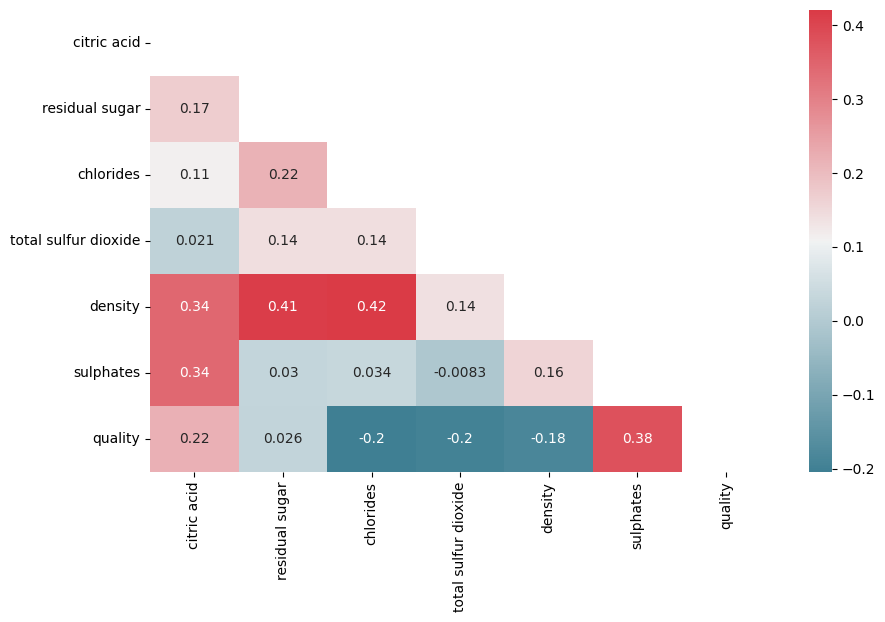

In [18]:
# drop the features mentioned
df2 = wine.drop(['fixed acidity', 'volatile acidity','pH', 'free sulfur dioxide', 'alcohol'], 1)

# check the correlations of the remaining features
plt.figure(figsize=(10,4))

mask = np.triu(np.ones_like(df2.corr('spearman'), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df2.corr('spearman'),mask=mask, cmap=cmap, annot=True)
plt.show() 

None of the remaining features have a high correlation with each other (The correlations are <0.5). 

## **Linear regression after manually dropping correlated features**

In [19]:
# build a linear model with these variables
X = df2.drop('quality', 1).values  #feature-set
y = df2['quality'].values #labels

# scaling the features
X = StandardScaler().fit_transform(X) # normalizing the features

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

linear = LinearRegression()
# fit training sets onto the model
linear.fit(X_train, y_train)

# predict using the test set
y_linear_predict = linear.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_predict})
print(predictions.describe())

# check the model performance 
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_linear_predict))
print('MSE_linear:', metrics.mean_squared_error(y_test, y_linear_predict))
print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

           Actual   Predicted
count  408.000000  408.000000
mean     5.639706    5.637645
std      0.835392    0.447836
min      3.000000    4.572146
25%      5.000000    5.302591
50%      6.000000    5.565130
75%      6.000000    5.964450
max      8.000000    7.133376
Mean Absolute Error : 0.5745063087478708
MSE_linear: 0.5494803662288468
RMSE_linear: 0.741269428904799
R_squared: 0.21070784743829107


<ipython-input-19-e86c074e863c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df2.drop('quality', 1).values  #feature-set


There is a slight improvement as seen on the RMSE AND R squared values. The RMSE drops by a very small number while the R^2 increases by a very small number. This is not what we expected. 

This is also not the best approach, manually dropping the features leads to information loss as it is majorly sort of guess work in deciding which variable goes and which one remains. 

## **Recursive Feature Elimination for dimensionality reduction.**

Recursive Feature Elimination (RFE) is a feature selection technique used to select the most important features in a dataset for a given machine learning problem. **It works by recursively removing less important features and fitting the model with the remaining features until a desired number of features is reached.**

The RFE algorithm starts by training the model with all the features in the dataset and computing a feature importance score for each feature. **The least important feature is then removed from the dataset, and the model is trained again on the remaining features.** This process is repeated until the desired number of features is reached.

In [33]:
X = wine.drop(['quality'], axis=1)
y = wine['quality']

# X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = LinearRegression()

rfe = RFE(model, n_features_to_select=8)

# fit RFE model to the data
rfe.fit(X_train, y_train)

# print the selected features/columns to keep
selected_features = X_train.columns[rfe.support_]
print("Selected features: ", selected_features)
# build model using these selected features
linear_rfe = LinearRegression()
linear_rfe.fit(X_train[selected_features],y_train)

# predict using the test set
y_rfe_predict = linear_rfe.predict(X_test[selected_features])

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfe_predict})
print(predictions.describe())

# check the model performance 
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_rfe_predict))
print('MSE_rfe:', metrics.mean_squared_error(y_test, y_rfe_predict))
print('RMSE_rfe:', np.sqrt(metrics.mean_squared_error(y_test, y_rfe_predict)))
print('R_squared:', metrics.r2_score(y_test, y_rfe_predict))

Selected features:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
           Actual   Predicted
count  408.000000  408.000000
mean     5.639706    5.649597
std      0.835392    0.509446
min      3.000000    4.648191
25%      5.000000    5.256785
50%      6.000000    5.546622
75%      6.000000    5.992426
max      8.000000    7.789757
Mean Absolute Error : 0.5534067501476209
MSE_rfe: 0.5104662947868156
RMSE_rfe: 0.714469239916468
R_squared: 0.2667489770604772


Using the Recursive Feature elimination with 8 features effectively improves the performance of the model. 

> The RMSE is lower than the previous models while the R^2 value improves and is much closer to the baseline method. It does much better than the previous methods, though not so perfect. 

## **Principal Component Analysis**

## **Regularization Techniques**